In [10]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset/merge with id?
merged_df = pd.merge(clinical_trial_df, mouse_drug_df, how='outer', on='Mouse ID')


# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [12]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [13]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_STD_error = merged_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_STD_error_df =pd.DataFrame(tumor_STD_error)
# Preview DataFrame
tumor_STD_error_df


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
...                                 ...
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mean_reformat = tumor_mean_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

error_reformat = tumor_STD_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


# Preview that Reformatting worked
mean_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


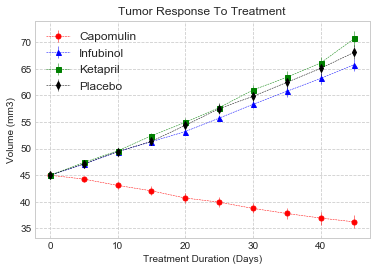

In [20]:
# Generate the Plot (with Error Bars)only 4 drugs
plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], yerr=error_pivot["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Infubinol"], yerr=error_pivot["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Ketapril"],yerr=error_pivot["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Placebo"],yerr=error_pivot["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)


# Set x and y axis labels including the title of the chart
plt.title('Tumor Response To Treatment') # Give plot main title
plt.xlabel('Treatment Duration (Days)') # set text for the x axis
plt.ylabel('Volume (mm3)') # set text for the y axis

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig("Tumor response.jpg")


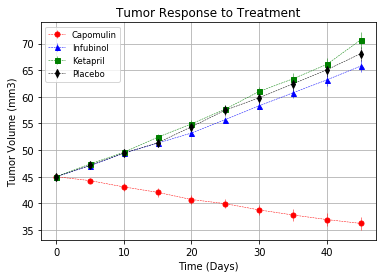

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_mean = merged_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
met_mean_df = pd.DataFrame(meta_mean)

# Preview DataFrame
met_mean_df.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [25]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stderror = merged_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
met_stderror_df = pd.DataFrame(met_stderror)

# Preview DataFrame
met_stderror_df.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [26]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_reformat = met_mean_df.reset_index()
met_mean_pivot = met_mean_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

met_stderror_reformat = met_stderror_df.reset_index()
met_stderror_pivot = met_stderror_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
mean_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


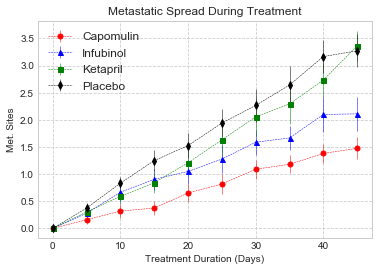

In [27]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Capomulin"], yerr=met_stderror_pivot["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Infubinol"], yerr=met_stderror_pivot["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Ketapril"],yerr=met_stderror_pivot["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_mean_pivot.index, met_mean_pivot["Placebo"],yerr=met_stderror_pivot["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)


# Set x and y axis labels including the title of the chart
plt.title('Metastatic Spread During Treatment') # Give plot main title
plt.xlabel('Treatment Duration (Days)') # set text for the x axis
plt.ylabel('Met. Sites') # set text for the y axis

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)


# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show()

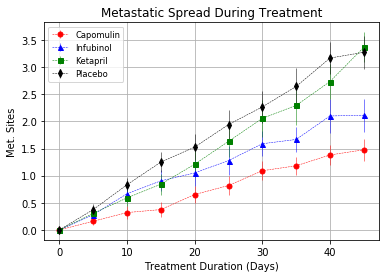

## Survival Rates

In [28]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
mice_count = merged_df.groupby(["Drug", "Timepoint"]).count()['Mouse ID']

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count})

# Preview DataFrame
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [29]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_reformat = mice_count_df.reset_index()
mice_pivot = mice_count_reformat.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
mice_pivot.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages??????)

# Save the Figure

# Show the Figure
plt.show()

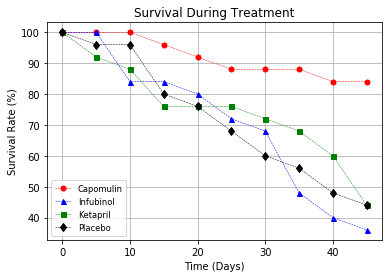

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

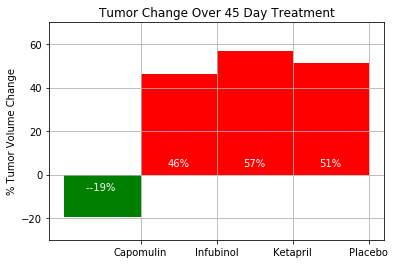

In [30]:
pwd!

'C:\\Users\\vlady\\Desktop\\homework\\Pymaceuticals'